In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
from google.colab import drive
from pathlib import Path
drive.mount("/content/drive")
data_dir = '/content/drive/My Drive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '$data_dir'

/content/drive/My Drive


In [ ]:
df = pd.read_csv('vehicles.csv')
df = df.head(10000)

In [ ]:
import torch
X = []
df['price'] = df['price'].fillna(10000)
df['year'] = df['year'].fillna(2000)
df['manufacturer'] = df['manufacturer'].fillna('ford')
df['condition'] = df['condition'].fillna('fair')
df['fuel'] = df['fuel'].fillna('fuel')
df['odometer'] = df['odometer'].fillna(0)
df['title_status'] = df['title_status'].fillna('clean')
df['transmission'] = df['transmission'].fillna('automatic')
df['drive'] = df['drive'].fillna('fwd')
df['type'] = df['type'].fillna('sedan')
print(np.unique(df['price']))
print(np.max(df['price']))
# turn categorical values into numerical values
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
df

[        0         1         3 ...    229500  99999999 987654321]
987654321


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,9669,23,23,6000,2000.0,11,-1,1,-1,2,0.0,0,0,-1,1,-1,9,-1,-1,-1,NaN,3,NaN,NaN,-1
1,7218891961,5298,8,8,11900,2000.0,11,-1,1,-1,2,0.0,0,0,-1,1,-1,9,-1,-1,-1,NaN,2,NaN,NaN,-1
2,7221797935,7969,11,16,21000,2000.0,11,-1,1,-1,2,0.0,0,0,-1,1,-1,9,-1,-1,-1,NaN,4,NaN,NaN,-1
3,7222270760,9999,27,27,1500,2000.0,11,-1,1,-1,2,0.0,0,0,-1,1,-1,9,-1,-1,-1,NaN,5,NaN,NaN,-1
4,7210384030,6387,13,11,4900,2000.0,11,-1,1,-1,2,0.0,0,0,-1,1,-1,9,-1,-1,-1,NaN,6,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7316825923,9517,22,22,15999,2015.0,12,429,2,5,3,135000.0,0,0,1104,1,1,0,8,3230,2215,NaN,3,33.415592,-111.657979,9476
9996,7316825904,9508,22,22,6999,2012.0,11,1192,2,3,3,153000.0,0,0,364,1,2,4,9,4121,1593,NaN,3,33.415592,-111.657937,9475
9997,7316825646,9520,22,22,24999,2015.0,30,12,2,6,3,107000.0,0,0,220,2,1,8,9,4363,2304,NaN,3,33.415592,-111.657915,9474
9998,7316825626,9502,22,22,7999,2011.0,11,1237,2,3,3,121000.0,0,0,1958,1,1,9,5,141,1433,NaN,3,33.415628,-111.657958,9473


In [ ]:
X = []
Y = []
# Inputs aand Outputs are normalized
for i in range(len(df)):
  X.append([(df['year'][i] - 1903) / (2022. - 1903),df['manufacturer'][i]/37.,df['condition'][i]/5.,df['fuel'][i]/5.,df['odometer'][i]/10000000.,df['title_status'][i]/5.,df['transmission'][i]/2,df['drive'][i]/2,df['type'][i]/12,df['state'][i]/12])
  Y.append([df['price'][i]/229500])

In [ ]:
print(X)
print(Y)

[[0.8151260504201681, 0.2972972972972973, 0.2, 0.4, 0.0, 0.0, 0.0, 0.5, 0.75, 0.25], [0.8151260504201681, 0.2972972972972973, 0.2, 0.4, 0.0, 0.0, 0.0, 0.5, 0.75, 0.16666666666666666], [0.8151260504201681, 0.2972972972972973, 0.2, 0.4, 0.0, 0.0, 0.0, 0.5, 0.75, 0.3333333333333333], [0.8151260504201681, 0.2972972972972973, 0.2, 0.4, 0.0, 0.0, 0.0, 0.5, 0.75, 0.4166666666666667], [0.8151260504201681, 0.2972972972972973, 0.2, 0.4, 0.0, 0.0, 0.0, 0.5, 0.75, 0.5], [0.8151260504201681, 0.2972972972972973, 0.2, 0.4, 0.0, 0.0, 0.0, 0.5, 0.75, 0.5833333333333334], [0.8151260504201681, 0.2972972972972973, 0.2, 0.4, 0.0, 0.0, 0.0, 0.5, 0.75, 0.5833333333333334], [0.8151260504201681, 0.2972972972972973, 0.2, 0.4, 0.0, 0.0, 0.0, 0.5, 0.75, 0.5833333333333334], [0.8151260504201681, 0.2972972972972973, 0.2, 0.4, 0.0, 0.0, 0.0, 0.5, 0.75, 0.6666666666666666], [0.8151260504201681, 0.2972972972972973, 0.2, 0.4, 0.0, 0.0, 0.0, 0.5, 0.75, 0.75], [0.8151260504201681, 0.2972972972972973, 0.2, 0.4, 0.0, 0.0, 

In [ ]:
X = torch.tensor(X,dtype=torch.float)
Y = torch.tensor(Y,dtype=torch.float)
import math
inputLayerSize, hiddenLayerSize, outputLayerSize = 10, 5, 1
from torch import nn
model = nn.Sequential(nn.Linear(inputLayerSize, hiddenLayerSize),
                       nn.Sigmoid(),
                       nn.Linear(hiddenLayerSize, outputLayerSize),
                       nn.Sigmoid()
                       )

# Training and using SGD optimizer
num_iterations = 20; lr = 1e-3; losses = []
from torch import optim
opt = optim.SGD(model.parameters(), lr=lr) #pass in the parameters we want to optimize. 
for i in range(num_iterations):
    yhat = model(X)
    loss = torch.sum(0.5*(Y-yhat)**2) #mean squared error
    loss.backward() #Compute Gradients
    print(loss.item())
    opt.step() #Take a gradient descent "step", note that we no longer need torch.no_grad() here.
    opt.zero_grad()
    losses.append(loss.item())

9353483.0
9353463.0
9353444.0
9353426.0
9353404.0
9353380.0
9353349.0
9353306.0
9353249.0
9353181.0
9353092.0
9352978.0
9352843.0
9352685.0
9352513.0
9352337.0
9352159.0
9351995.0
9351880.0
9352037.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


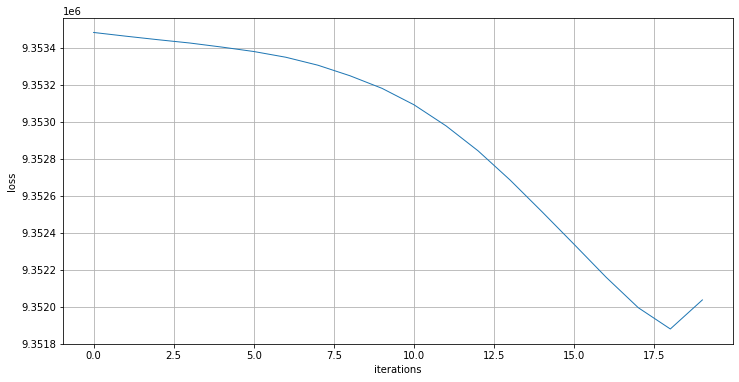

In [ ]:
from matplotlib.pyplot import *
fig = figure(0, (12,6))
plot(losses, linewidth = 1); grid(1); xlabel('iterations'); ylabel('loss');

In [ ]:
yhat = model(X[8900])
print(yhat*229500)

tensor([12315.7090], grad_fn=<MulBackward0>)


In [ ]:
torch.save(model,'/content/drive/MyDrive/cars.pkl')